# ISL - Detection
Dataset - https://drive.google.com/drive/folders/18o8eNnMfVyaUpdQeeVDFQWhPGqwsicNR?usp=share_link

In [1]:
# data visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# image processing libraries
import cv2
import skimage
from skimage.transform import resize

# tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

2023-04-30 02:52:58.854791: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-30 02:52:58.857804: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-30 02:52:58.913098: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-30 02:52:58.914563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 02:52:59.687467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 35

train_len = 87000
train_dir = 'isl-dataset/isl_alphabet_train'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['1']:
                label = 26
            elif folderName in ['2']:
                label = 27
            elif folderName in ['3']:
                label = 28           
            elif folderName in ['4']:
                label = 29           
            elif folderName in ['5']:
                label = 30           
            elif folderName in ['6']:
                label = 31           
            elif folderName in ['7']:
                label = 32           
            elif folderName in ['8']:
                label = 33           
            elif folderName in ['9']:
                label = 34              
            else:
                label = 35
            for image_filename in os.listdir(folder + '/' + folderName):
                img_file = cv2.imread(folder + '/' + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")
# for folderName in os.listdir(train_dir):
#     print(folderName)
#     for image_filename in os.listdir(train_dir + '/' + folderName):
#         print(image_filename)




/tmp/ipykernel_1116587/3933346960.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.empty((train_len,), dtype=np.int)


Images successfully imported...


The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)
The shape of one image is :  (64, 64, 3)


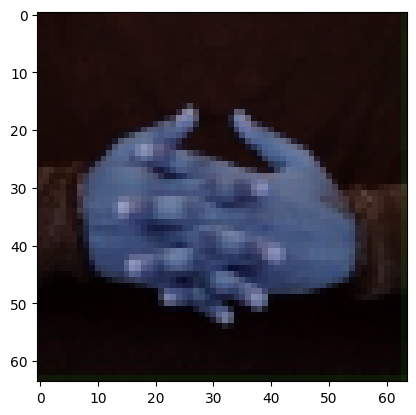

In [3]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)
print("The shape of one image is : ", X_train[0].shape)
plt.imshow(X_train[0])
plt.show()

In [4]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [6]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,35)
y_cat_test = to_categorical(y_test,35)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 35)
(26100, 35)


In [8]:
import gc
del X_data
del y_data
gc.collect()

3482

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


In [10]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(35, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

2023-04-30 02:58:15.087908: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-30 02:58:15.088667: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_cat_train,
          epochs=2,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/2
952/952 - 100s - loss: 0.0951 - accuracy: 0.9834 - val_loss: 0.0056 - val_accuracy: 0.9983 - 100s/epoch - 105ms/step
Epoch 2/2
952/952 - 97s - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0021 - val_accuracy: 0.9993 - 97s/epoch - 102ms/step


In [14]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.095145,0.983432,0.005616,0.998314
1,0.003721,0.998900,0.002069,0.999349


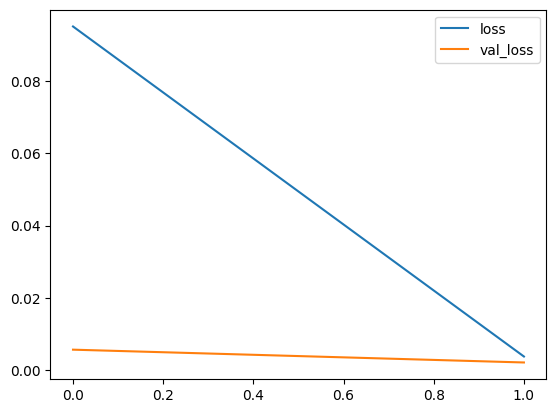

In [15]:
metrics[['loss','val_loss']].plot()
plt.show()

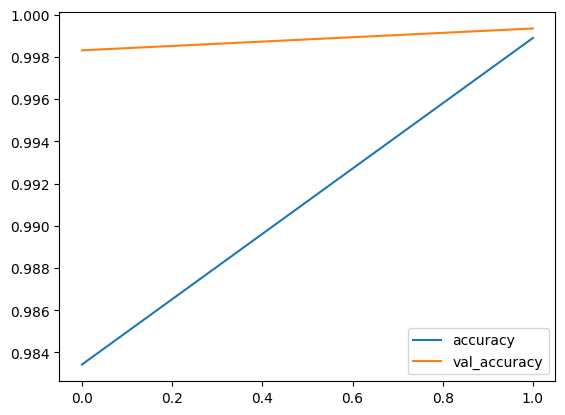

In [16]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [17]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.0020685489289462566, 0.9993486404418945]

In [18]:
predictions = model.predict(X_test)
classes_x = np.argmax(predictions, axis=1)
print("Predictions done...")

816/816 [==============================] - 15s 19ms/step
Predictions done...


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13636
           1       1.00      1.00      1.00       360
           2       1.00      0.98      0.99       434
           3       1.00      1.00      1.00       360
           4       1.00      1.00      1.00       360
           5       1.00      1.00      1.00       360
           6       1.00      1.00      1.00       360
           7       1.00      1.00      1.00       360
           8       1.00      1.00      1.00       414
           9       1.00      1.00      1.00       360
          10       1.00      1.00      1.00       360
          11       1.00      1.00      1.00       360
          12       1.00      1.00      1.00       360
          13       1.00      1.00      1.00       360
          14       1.00      1.00      1.00       429
          15       1.00      1.00      1.00       360
          16       1.00      1.00      1.00       360
          17       1.00    

In [23]:
# plt.figure(figsize=(12,12))
# sns.heatmap(confusion_matrix(y_test,classes_x))
# plt.show()

conf_mat = confusion_matrix(y_test, classes_x)
print(conf_mat)

# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()



[[13636     0     0 ...     0     0     0]
 [    0   360     0 ...     0     0     0]
 [    0     0   424 ...     0     0     0]
 ...
 [    0     0     0 ...   360     0     0]
 [    0     0     0 ...     0   360     0]
 [    0     0     0 ...     0     0   360]]


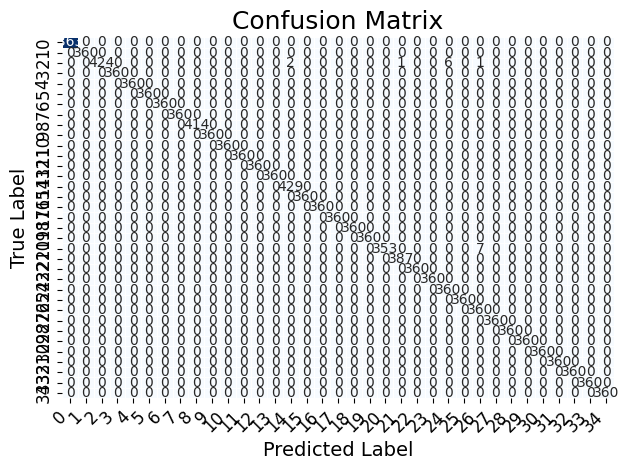

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, classes_x)

# Plot confusion matrix as heatmap
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='d', linewidths=0.5, cbar=False)

# Customize labels and title
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)

# Customize tick marks and font size
tick_marks = [i + 0.5 for i in range(len(set(y_test)))]
class_labels = list(set(y_test))
plt.xticks(tick_marks, class_labels, rotation=45, ha='right', fontsize=12)
plt.yticks(tick_marks, class_labels, fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


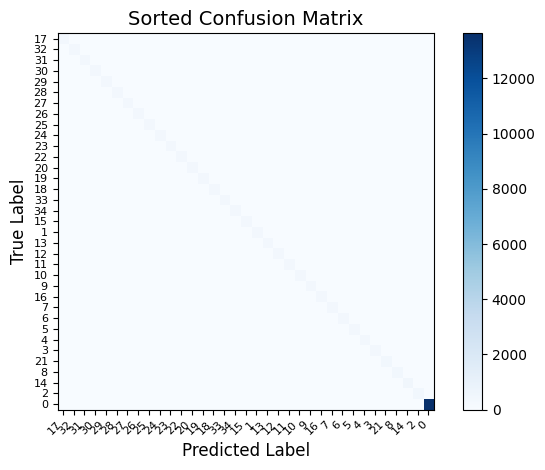

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, classes_x)

# Calculate overall frequency of each class
freq = np.sum(conf_mat, axis=1)

# Sort classes by frequency or by misclassification rate
sorted_idx = np.argsort(freq)
# sorted_idx = np.argsort(np.diag(conf_mat) / freq)

# Sort confusion matrix and class labels
sorted_conf_mat = conf_mat[sorted_idx][:, sorted_idx]
class_labels = [str(i) for i in sorted_idx]

# Plot sorted confusion matrix as heatmap
plt.imshow(sorted_conf_mat, cmap='Blues')

# Add colorbar and labels
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45, ha='right', fontsize=8)
plt.yticks(tick_marks, class_labels, fontsize=8)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Sorted Confusion Matrix', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


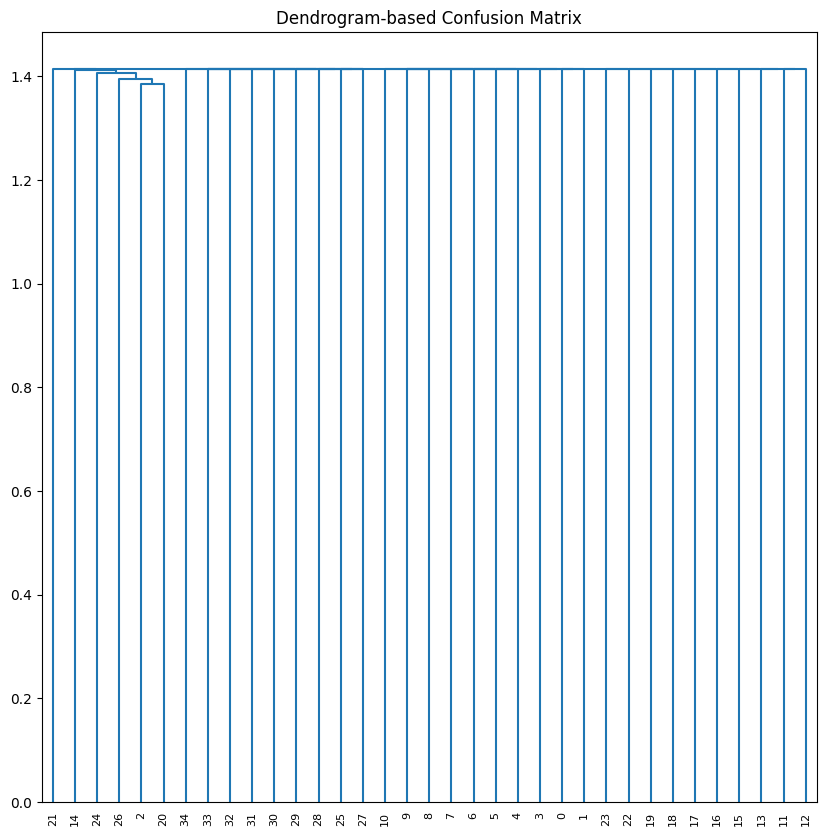

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, classes_x)

# Calculate similarity matrix
sim_mat = np.zeros_like(conf_mat, dtype=np.float32)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[0]):
        sim_mat[i, j] = 1 - (conf_mat[i, j] / np.sum(conf_mat[i]))

# Calculate linkage matrix
Z = linkage(sim_mat, method='ward')

# Plot dendrogram
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Dendrogram-based Confusion Matrix')
dendrogram(Z, labels=[str(i) for i in range(conf_mat.shape[0])], ax=ax, leaf_rotation=90)

# Show plot
plt.show()
